# Malhan et al. (2024)

The aim of this notebook is to replicate the plots obtained by [Malhan et al. (2024)](https://ui.adsabs.harvard.edu/abs/2024ApJ...964..104M/abstract).

In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy.stats import binned_statistic

/u/fiza/conda-envs/auriga/lib/python3.7/site-packages/setuptools/_importlib.py:23: UserWarning: `importlib-metadata` version is incompatible with `setuptools`.
This problem is likely to be solved by installing an updated version of `importlib-metadata`.
  warnings.warn(msg)  # Ensure a descriptive message is shown.


In [2]:
from auriga.snapshot import Snapshot
from auriga.images import figure_setup
from auriga.settings import Settings
from auriga.parser import parse

In [18]:
figure_setup()
settings = Settings()

In [6]:
def read_data(simulation: str) -> tuple:
    """
    This method returns data of interest for this analysis.

    Parameters
    ----------
    simulation : str
        The simulation to consider.

    Returns
    -------
    pd.DataFrame
        A data frame with the properties.
    """

    settings = Settings()

    s = Snapshot(simulation=simulation, loadonlytype=[0, 1, 2, 3, 4, 5])
    s.tag_particles_by_region(
        disc_std_circ=settings.disc_std_circ,
        disc_min_circ=settings.disc_min_circ,
        cold_disc_delta_circ=settings.cold_disc_delta_circ,
        bulge_max_specific_energy=settings.bulge_max_specific_energy)
    s.add_metal_abundance(of="Fe", to='H')
    s.add_metal_abundance(of="Mg", to="Fe")

    is_real_star = (s.type == 4) & (s.stellar_formation_time > 0)
    is_main_obj = (s.halo == s.halo_idx) & (s.subhalo == s.subhalo_idx)

    df = pd.DataFrame()

    df["zSpecificAngularMomentum_kpckm/s"] = \
        np.cross(s.pos, s.vel)[is_real_star & is_main_obj, 2] \
            * s.expansion_factor
    df["GravPotential_km^2/s^2"] = s.potential[is_real_star & is_main_obj]
    df["RegionTag"] = s.region_tag[is_real_star & is_main_obj]
    
    df["[Fe/H]"] = s.metal_abundance[f"Fe/H"][is_real_star & is_main_obj]
    df["[Mg/Fe]"] = s.metal_abundance[f"Mg/Fe"][is_real_star & is_main_obj]

    return df

In [13]:
simulation = "au6_or_l4_s127"
df = read_data(simulation=simulation)
df[~np.isfinite(df)] = np.nan
df.dropna(inplace=True)

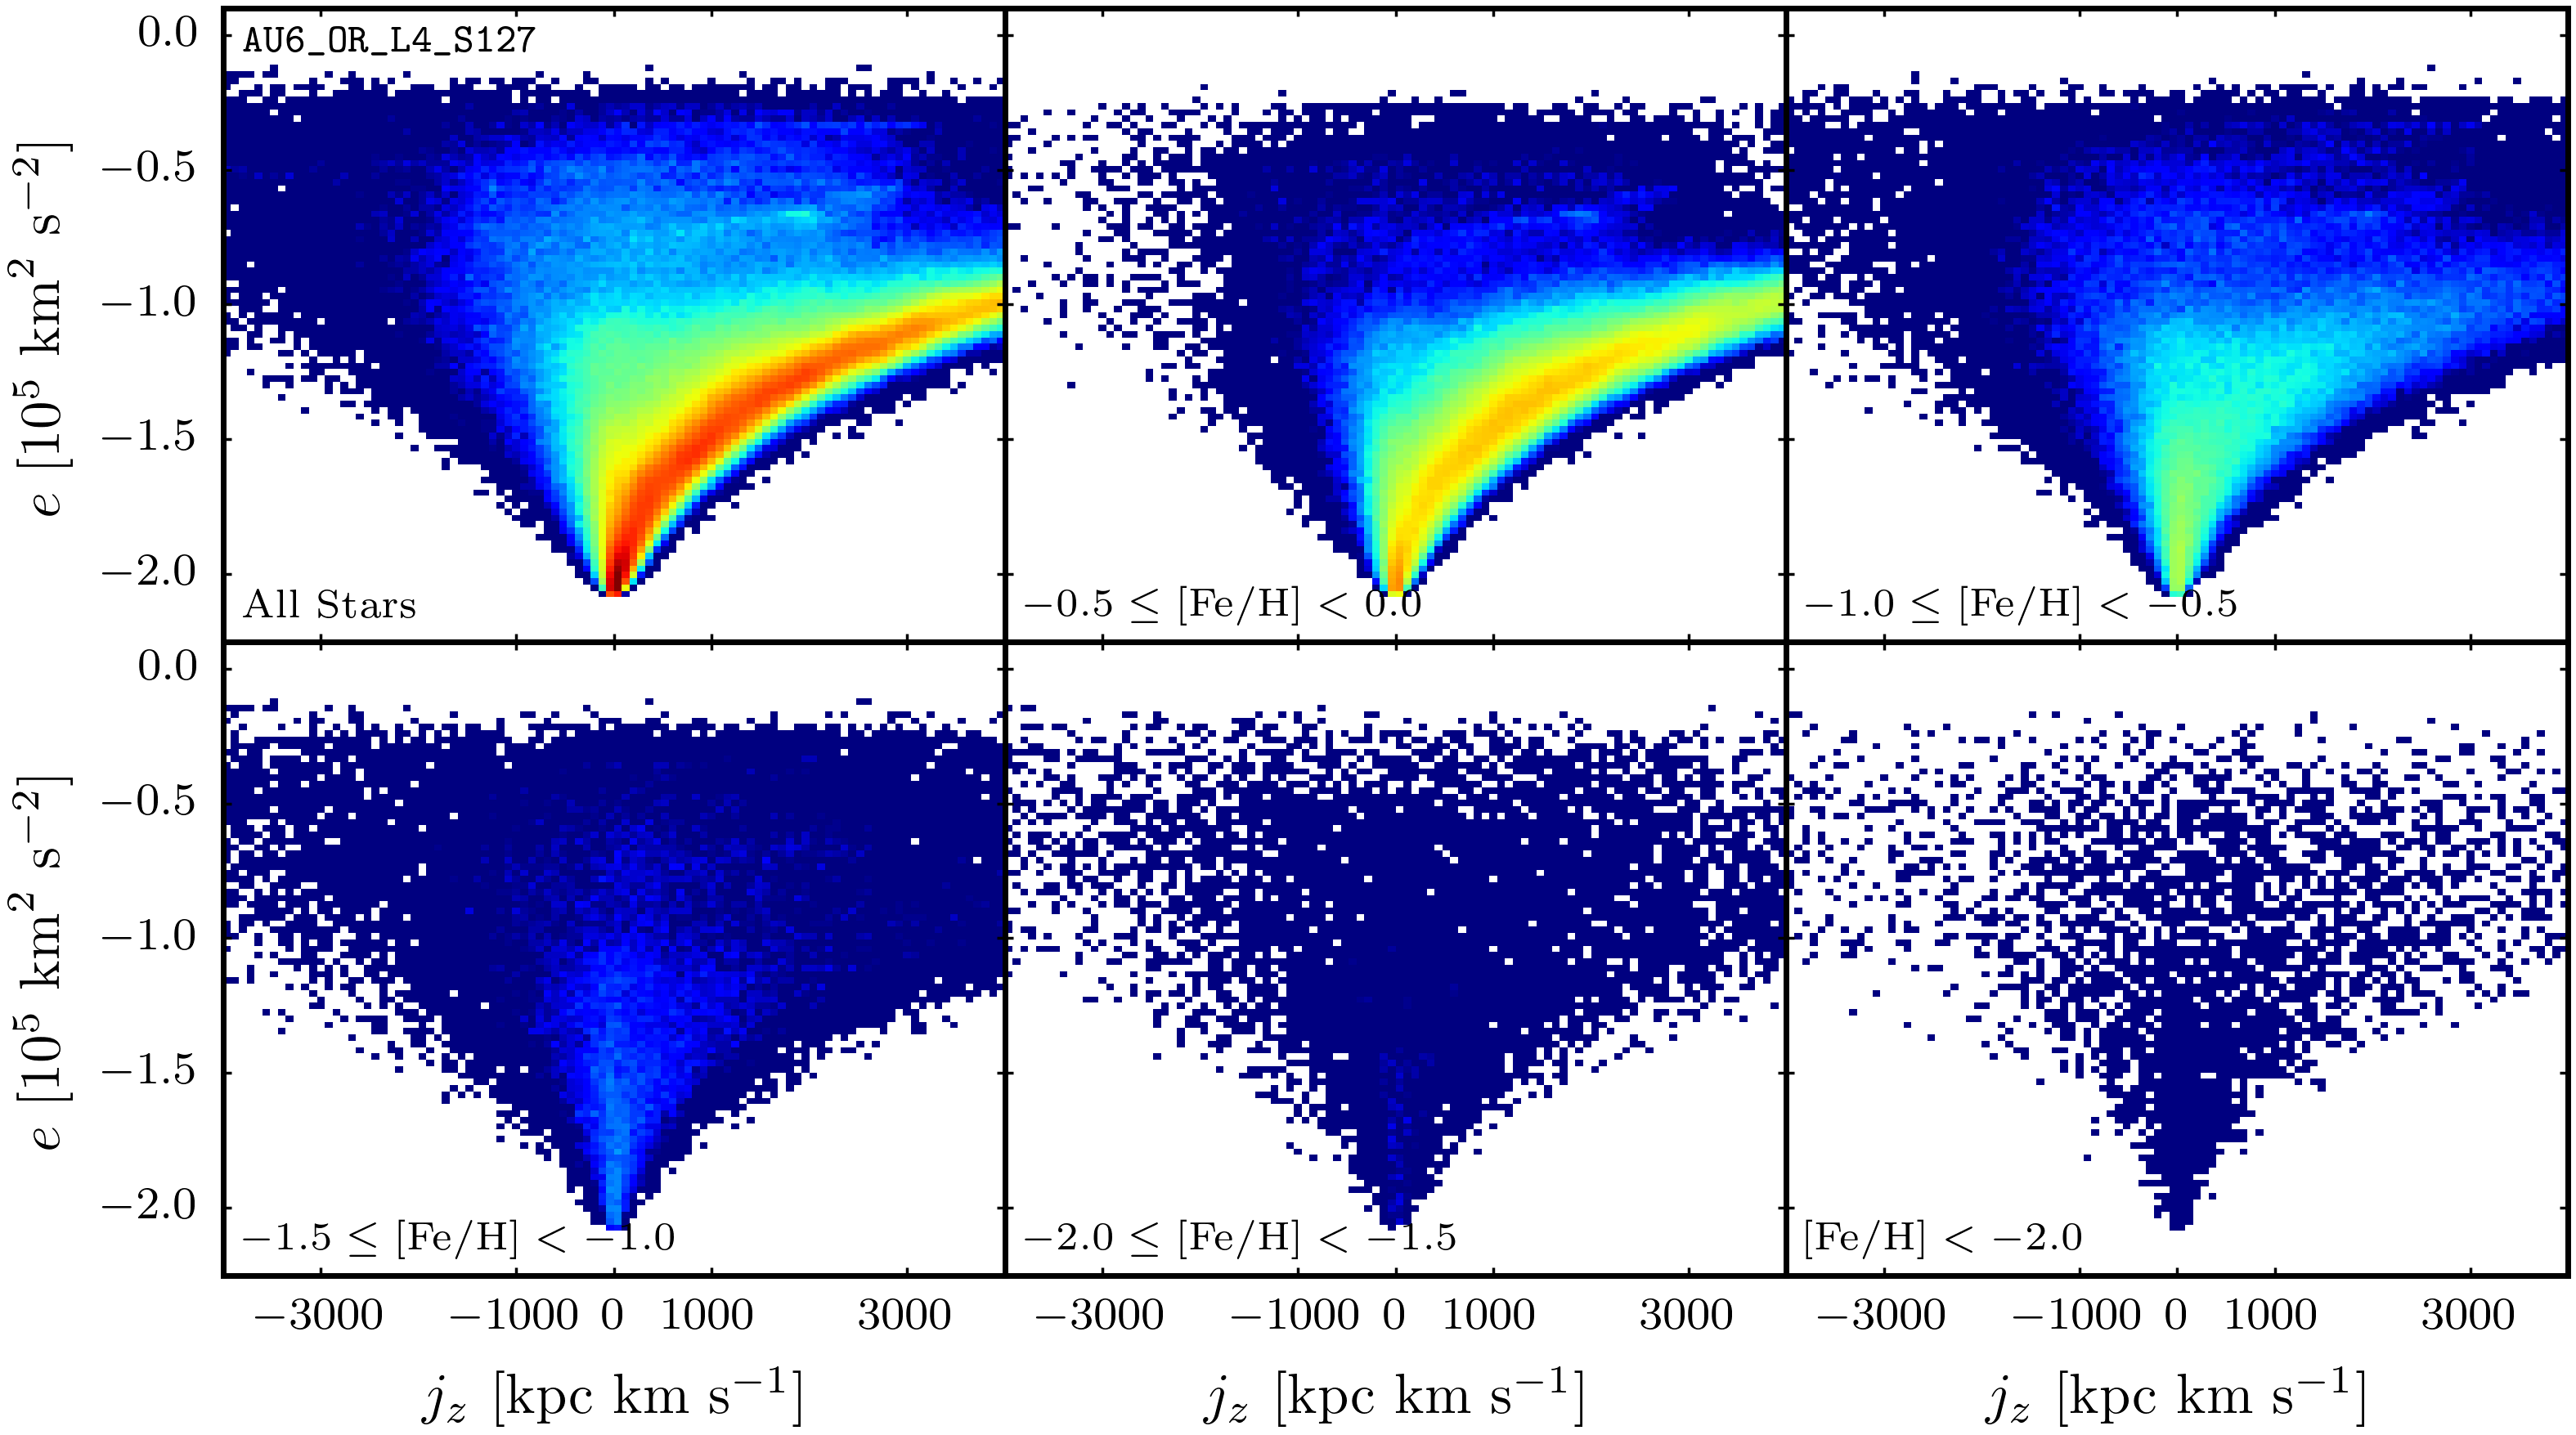

In [62]:
fig = plt.figure(figsize=(7.4, 4.0))
gs = fig.add_gridspec(nrows=2, ncols=3, hspace=0.0, wspace=0.0)
axs = gs.subplots(sharex=True, sharey=True)

for ax in axs.flatten():
    ax.tick_params(which='both', direction="in")
    ax.set_xlim(-4000, 4000)
    ax.set_ylim(-2.25, 0.1)
    ax.set_xlabel(r"$j_z$ [$\mathrm{kpc} ~ \mathrm{km} ~ \mathrm{s}^{-1}$]")
    ax.set_ylabel(r"$e$ [$10^5 ~ \mathrm{km}^2 ~ \mathrm{s}^{-2}$]")
    ax.set_xticks([-3000, -1000, 0, 1000, 3000])
    ax.label_outer()

_, _, _, im = axs[0, 0].hist2d(
    x=df["zSpecificAngularMomentum_kpckm/s"],
    y=df["GravPotential_km^2/s^2"] / 1E5,
    range=[axs[0, 0].get_xlim(), axs[0, 0].get_ylim()], bins=[100, 100],
    norm=mpl.colors.LogNorm(vmin=10, vmax=10000),
    )
axs[0, 0].text(
    x=0.025, y=0.975, size=7.0, c="black",
    s=r"$\texttt{" + simulation.upper() + "}$",
    ha="left", va="top", transform=axs[0, 0].transAxes)
axs[0, 0].text(
    x=0.025, y=0.025, size=7.0, c="black",
    s="All Stars",
    ha="left", va="bottom", transform=axs[0, 0].transAxes)

is_metall = (df["[Fe/H]"] >= -0.5) & (df["[Fe/H]"] < 0)
_, _, _, im = axs[0, 1].hist2d(
    x=df["zSpecificAngularMomentum_kpckm/s"][is_metall],
    y=df["GravPotential_km^2/s^2"][is_metall] / 1E5,
    range=[axs[0, 1].get_xlim(), axs[0, 1].get_ylim()], bins=[100, 100],
    norm=mpl.colors.LogNorm(vmin=10, vmax=10000),
    )
axs[0, 1].text(
    x=0.025, y=0.025, size=7.0, c="black",
    s=r"$-0.5 \leq \mathrm{[Fe/H]} < 0.0$",
    ha="left", va="bottom", transform=axs[0, 1].transAxes)

is_metall = (df["[Fe/H]"] >= -1.0) & (df["[Fe/H]"] < -0.5)
_, _, _, im = axs[0, 2].hist2d(
    x=df["zSpecificAngularMomentum_kpckm/s"][is_metall],
    y=df["GravPotential_km^2/s^2"][is_metall] / 1E5,
    range=[axs[0, 2].get_xlim(), axs[0, 2].get_ylim()], bins=[100, 100],
    norm=mpl.colors.LogNorm(vmin=10, vmax=10000),
    )
axs[0, 2].text(
    x=0.025, y=0.025, size=7.0, c="black",
    s=r"$-1.0 \leq \mathrm{[Fe/H]} < -0.5$",
    ha="left", va="bottom", transform=axs[0, 2].transAxes)

is_metall = (df["[Fe/H]"] >= -1.5) & (df["[Fe/H]"] < -1.0)
_, _, _, im = axs[1, 0].hist2d(
    x=df["zSpecificAngularMomentum_kpckm/s"][is_metall],
    y=df["GravPotential_km^2/s^2"][is_metall] / 1E5,
    range=[axs[1, 0].get_xlim(), axs[1, 0].get_ylim()], bins=[100, 100],
    norm=mpl.colors.LogNorm(vmin=10, vmax=10000),
    )
axs[1, 0].text(
    x=0.025, y=0.025, size=7.0, c="black",
    s=r"$-1.5 \leq \mathrm{[Fe/H]} < -1.0$",
    ha="left", va="bottom", transform=axs[1, 0].transAxes)

is_metall = (df["[Fe/H]"] >= -2.0) & (df["[Fe/H]"] < -1.5)
_, _, _, im = axs[1, 1].hist2d(
    x=df["zSpecificAngularMomentum_kpckm/s"][is_metall],
    y=df["GravPotential_km^2/s^2"][is_metall] / 1E5,
    range=[axs[1, 1].get_xlim(), axs[1, 1].get_ylim()], bins=[100, 100],
    norm=mpl.colors.LogNorm(vmin=10, vmax=10000),
    )
axs[1, 1].text(
    x=0.025, y=0.025, size=7.0, c="black",
    s=r"$-2.0 \leq \mathrm{[Fe/H]} < -1.5$",
    ha="left", va="bottom", transform=axs[1, 1].transAxes)

is_metall = (df["[Fe/H]"] < -2.0)
_, _, _, im = axs[1, 2].hist2d(
    x=df["zSpecificAngularMomentum_kpckm/s"][is_metall],
    y=df["GravPotential_km^2/s^2"][is_metall] / 1E5,
    range=[axs[1, 2].get_xlim(), axs[1, 2].get_ylim()], bins=[100, 100],
    norm=mpl.colors.LogNorm(vmin=10, vmax=10000),
    )
axs[1, 2].text(
    x=0.025, y=0.025, size=7.0, c="black",
    s=r"$\mathrm{[Fe/H]} < -2.0$",
    ha="left", va="bottom", transform=axs[1, 2].transAxes)

plt.show()

In [70]:
simulation = "au8_or_l4_s127"
df = read_data(simulation=simulation)
df[~np.isfinite(df)] = np.nan
df.dropna(inplace=True)

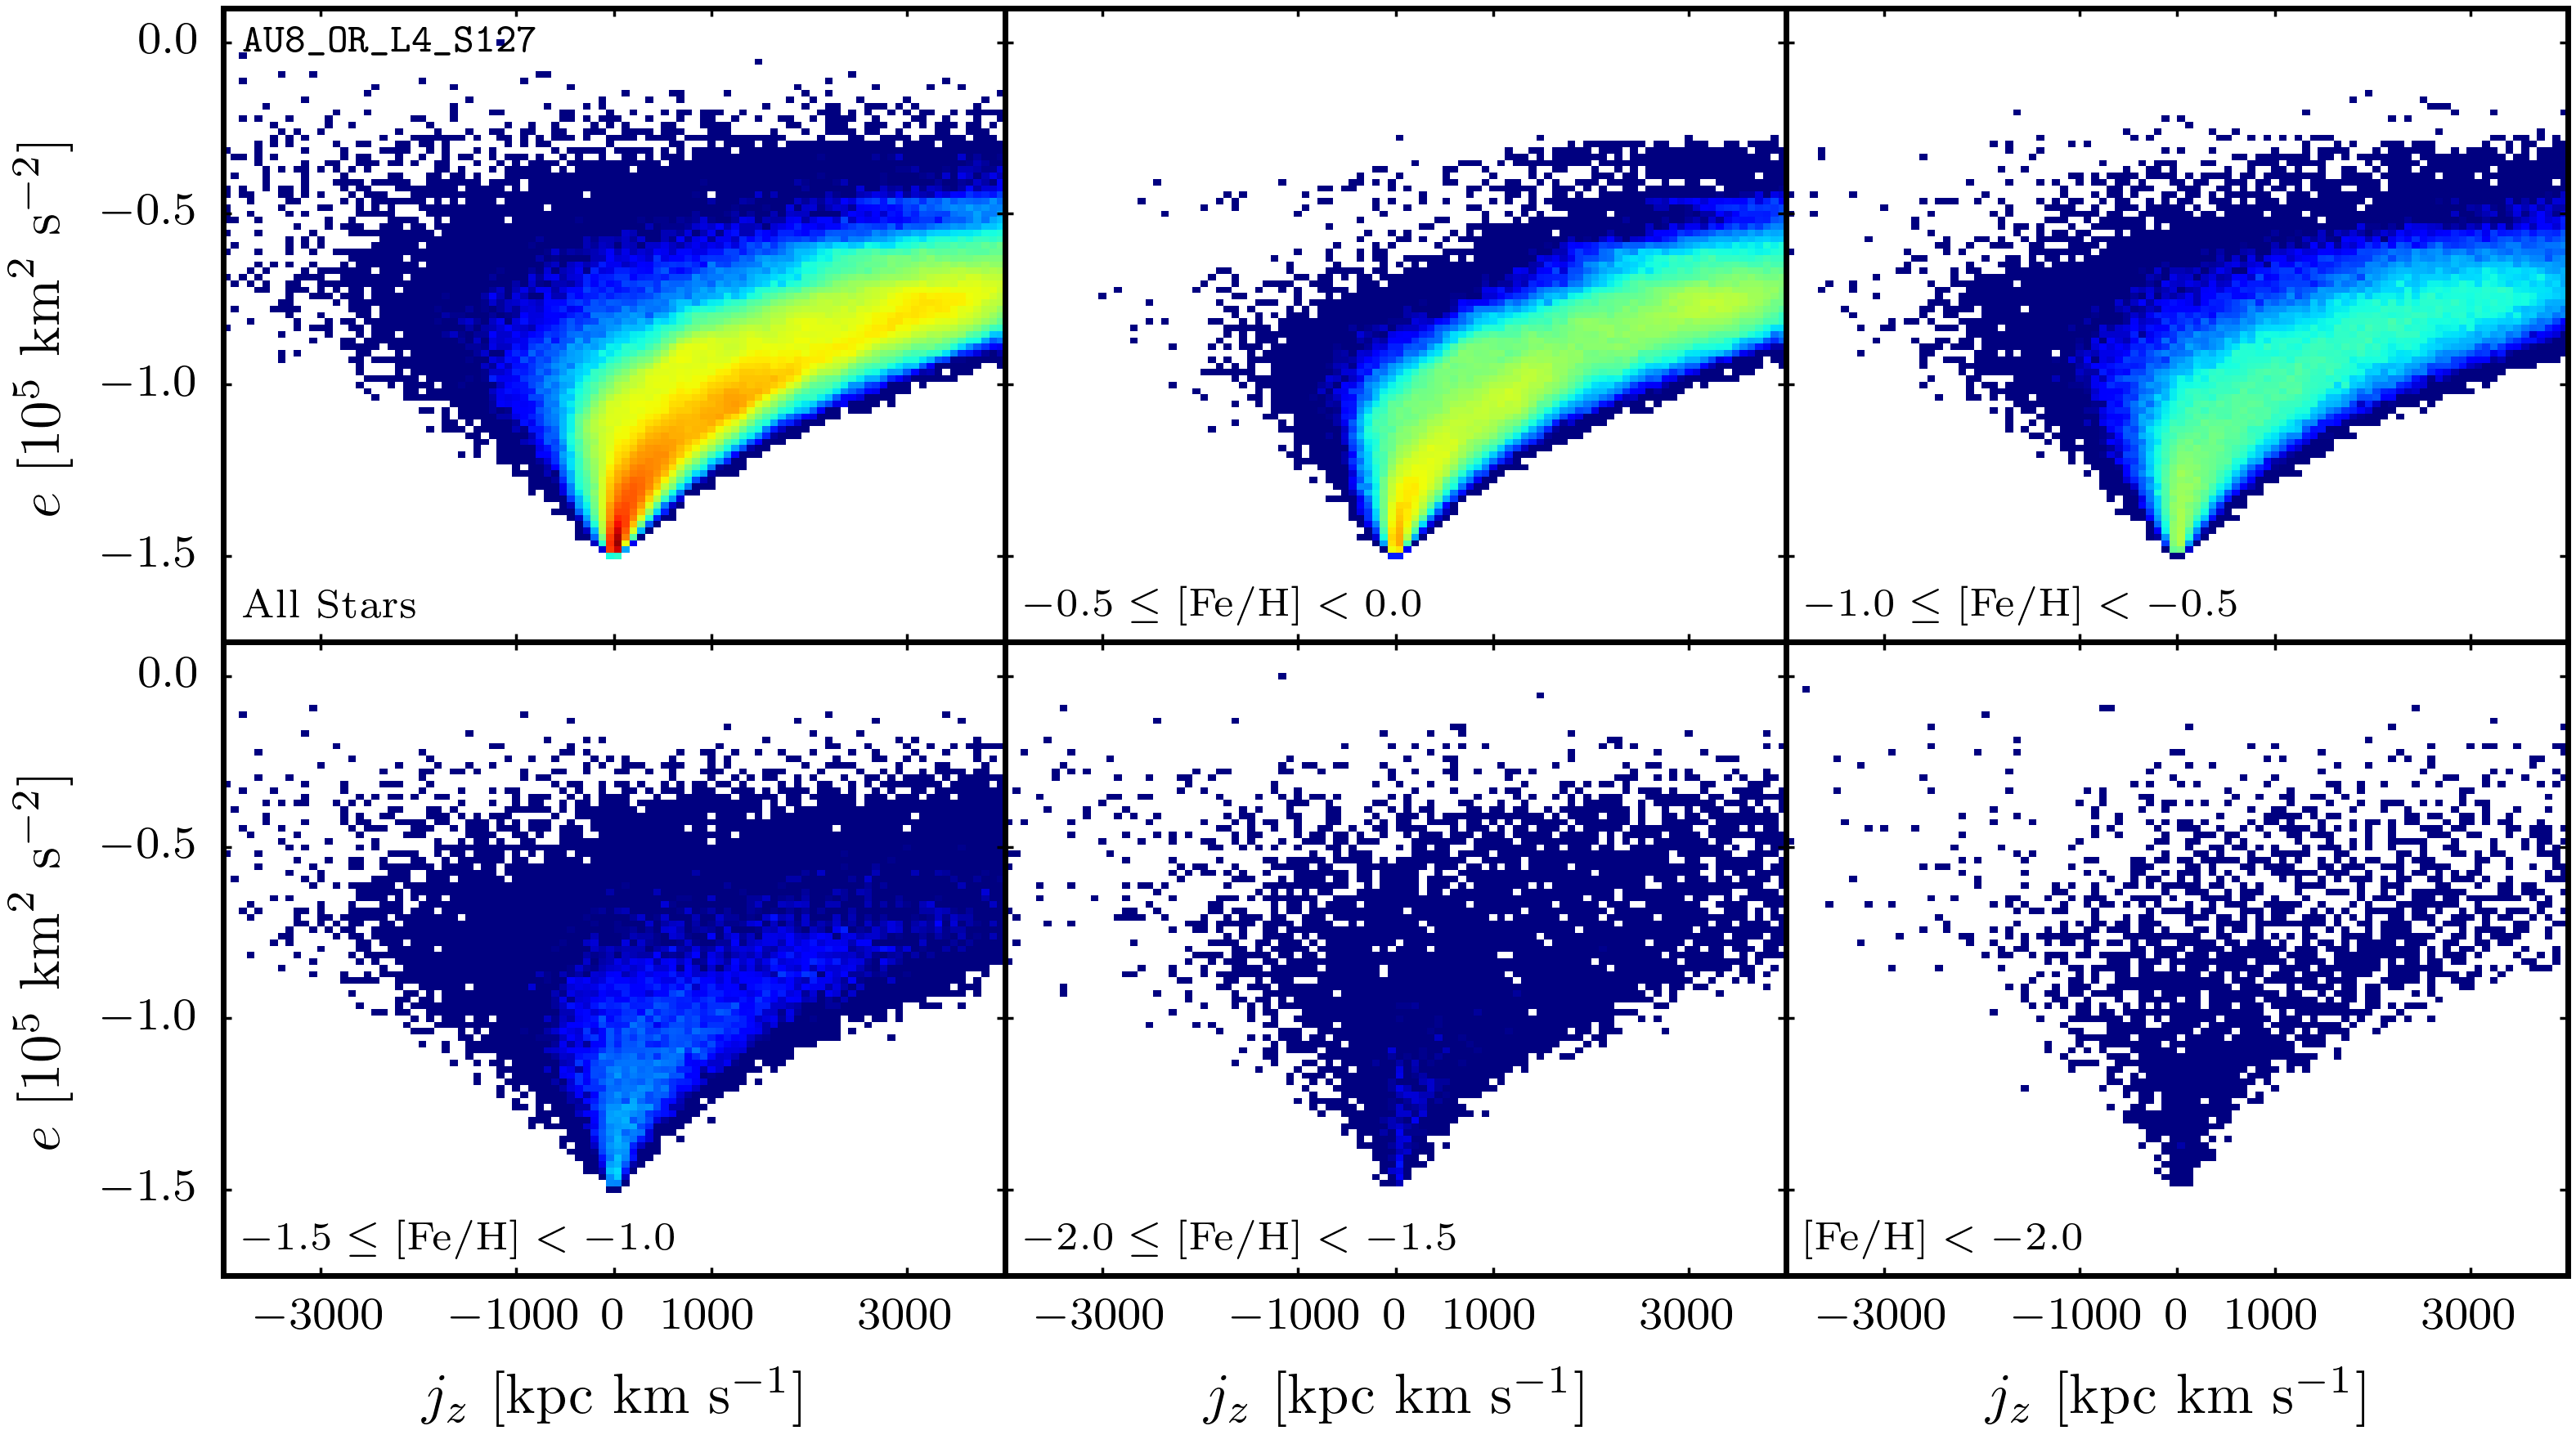

In [73]:
fig = plt.figure(figsize=(7.4, 4.0))
gs = fig.add_gridspec(nrows=2, ncols=3, hspace=0.0, wspace=0.0)
axs = gs.subplots(sharex=True, sharey=True)

for ax in axs.flatten():
    ax.tick_params(which='both', direction="in")
    ax.set_xlim(-4000, 4000)
    ax.set_ylim(-1.75, 0.1)
    ax.set_xlabel(r"$j_z$ [$\mathrm{kpc} ~ \mathrm{km} ~ \mathrm{s}^{-1}$]")
    ax.set_ylabel(r"$e$ [$10^5 ~ \mathrm{km}^2 ~ \mathrm{s}^{-2}$]")
    ax.set_xticks([-3000, -1000, 0, 1000, 3000])
    ax.set_yticks([-1.5, -1, -0.5, 0])
    ax.label_outer()

_, _, _, im = axs[0, 0].hist2d(
    x=df["zSpecificAngularMomentum_kpckm/s"],
    y=df["GravPotential_km^2/s^2"] / 1E5,
    range=[axs[0, 0].get_xlim(), axs[0, 0].get_ylim()], bins=[100, 100],
    norm=mpl.colors.LogNorm(vmin=10, vmax=10000),
    )
axs[0, 0].text(
    x=0.025, y=0.975, size=7.0, c="black",
    s=r"$\texttt{" + simulation.upper() + "}$",
    ha="left", va="top", transform=axs[0, 0].transAxes)
axs[0, 0].text(
    x=0.025, y=0.025, size=7.0, c="black",
    s="All Stars",
    ha="left", va="bottom", transform=axs[0, 0].transAxes)

is_metall = (df["[Fe/H]"] >= -0.5) & (df["[Fe/H]"] < 0)
_, _, _, im = axs[0, 1].hist2d(
    x=df["zSpecificAngularMomentum_kpckm/s"][is_metall],
    y=df["GravPotential_km^2/s^2"][is_metall] / 1E5,
    range=[axs[0, 1].get_xlim(), axs[0, 1].get_ylim()], bins=[100, 100],
    norm=mpl.colors.LogNorm(vmin=10, vmax=10000),
    )
axs[0, 1].text(
    x=0.025, y=0.025, size=7.0, c="black",
    s=r"$-0.5 \leq \mathrm{[Fe/H]} < 0.0$",
    ha="left", va="bottom", transform=axs[0, 1].transAxes)

is_metall = (df["[Fe/H]"] >= -1.0) & (df["[Fe/H]"] < -0.5)
_, _, _, im = axs[0, 2].hist2d(
    x=df["zSpecificAngularMomentum_kpckm/s"][is_metall],
    y=df["GravPotential_km^2/s^2"][is_metall] / 1E5,
    range=[axs[0, 2].get_xlim(), axs[0, 2].get_ylim()], bins=[100, 100],
    norm=mpl.colors.LogNorm(vmin=10, vmax=10000),
    )
axs[0, 2].text(
    x=0.025, y=0.025, size=7.0, c="black",
    s=r"$-1.0 \leq \mathrm{[Fe/H]} < -0.5$",
    ha="left", va="bottom", transform=axs[0, 2].transAxes)

is_metall = (df["[Fe/H]"] >= -1.5) & (df["[Fe/H]"] < -1.0)
_, _, _, im = axs[1, 0].hist2d(
    x=df["zSpecificAngularMomentum_kpckm/s"][is_metall],
    y=df["GravPotential_km^2/s^2"][is_metall] / 1E5,
    range=[axs[1, 0].get_xlim(), axs[1, 0].get_ylim()], bins=[100, 100],
    norm=mpl.colors.LogNorm(vmin=10, vmax=10000),
    )
axs[1, 0].text(
    x=0.025, y=0.025, size=7.0, c="black",
    s=r"$-1.5 \leq \mathrm{[Fe/H]} < -1.0$",
    ha="left", va="bottom", transform=axs[1, 0].transAxes)

is_metall = (df["[Fe/H]"] >= -2.0) & (df["[Fe/H]"] < -1.5)
_, _, _, im = axs[1, 1].hist2d(
    x=df["zSpecificAngularMomentum_kpckm/s"][is_metall],
    y=df["GravPotential_km^2/s^2"][is_metall] / 1E5,
    range=[axs[1, 1].get_xlim(), axs[1, 1].get_ylim()], bins=[100, 100],
    norm=mpl.colors.LogNorm(vmin=10, vmax=10000),
    )
axs[1, 1].text(
    x=0.025, y=0.025, size=7.0, c="black",
    s=r"$-2.0 \leq \mathrm{[Fe/H]} < -1.5$",
    ha="left", va="bottom", transform=axs[1, 1].transAxes)

is_metall = (df["[Fe/H]"] < -2.0)
_, _, _, im = axs[1, 2].hist2d(
    x=df["zSpecificAngularMomentum_kpckm/s"][is_metall],
    y=df["GravPotential_km^2/s^2"][is_metall] / 1E5,
    range=[axs[1, 2].get_xlim(), axs[1, 2].get_ylim()], bins=[100, 100],
    norm=mpl.colors.LogNorm(vmin=10, vmax=10000),
    )
axs[1, 2].text(
    x=0.025, y=0.025, size=7.0, c="black",
    s=r"$\mathrm{[Fe/H]} < -2.0$",
    ha="left", va="bottom", transform=axs[1, 2].transAxes)

plt.show()